# Neural network training on 5 resolution bins

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from keras import layers
import os
import glob
import math

# === Configuration ===
training_folder = "/Users/qingshuzhao/Library/CloudStorage/OneDrive-SharedLibraries-UWM/Arjun Saha - qingshu_project/Paper/SI/training_set/by_resolution/5_groups/"
training_files = sorted(glob.glob(os.path.join(training_folder, "*.csv")))  # Ensure consistent order
subset_sizes = list(range(5, 120, 5))

test_sets = {
    "Nanobody": pd.read_csv("/Users/qingshuzhao/Documents/ML_PPI_project/Paper/SI/validation_set/nanobody_testset.csv"),
    "PDBind": pd.read_csv("/Users/qingshuzhao/Documents/ML_PPI_project/Paper/SI/validation_set/PDBind_testset.csv"),
    "Contini_data": pd.read_csv("/Users/qingshuzhao/Documents/ML_PPI_project/Paper/SI/validation_set/Nazmul_20_testset.csv")
}

# Preprocess test sets
for name, df_test in test_sets.items():
    df_test.drop(columns=['description', 'packstat', 'yhh_planarity'], inplace=True)
    df_test.dropna(inplace=True)
    df_test.reset_index(drop=True, inplace=True)

# === Collect RMSE data from all files ===
all_rmse_data = {}
all_subset_sizes = {}

for training_file in training_files:
    print(f"Processing file: {training_file}")
    df = pd.read_csv(training_file)
    df.dropna(inplace=True)
    df['dG_exp'] = (1.98722 * 298.15 * np.log(df['kd_molar']) / 1000)
    df.drop(columns=['resolution', 'kd_molar', 'pdb_id'], inplace=True)

    X_full = df.drop(columns=['dG_exp'])
    y_full = df['dG_exp']
    X_train_full, _, y_train_full, _ = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

    rmse_dict = {name: [] for name in test_sets}
    actual_sizes = []

    for size in subset_sizes:
        if size > len(X_train_full):
            continue
        actual_sizes.append(size)

        X_sub = X_train_full.iloc[:size]
        y_sub = y_train_full.iloc[:size]

        scaler = MinMaxScaler()
        X_sub_scaled = scaler.fit_transform(X_sub)

        model = keras.Sequential([
            layers.Dense(4, kernel_initializer='he_uniform', activation='relu', input_shape=(X_sub.shape[1],)),
            layers.Dense(10, kernel_initializer='he_uniform', activation='relu'),
            layers.Dense(8, kernel_initializer='he_uniform', activation='relu'),
            layers.Dense(12, kernel_initializer='he_uniform', activation='relu'),
            layers.Dense(1, kernel_initializer='uniform')
        ])
        model.compile(optimizer='adamax', loss='mse')
        model.fit(X_sub_scaled, y_sub, epochs=100, batch_size=8, verbose=0)

        for name, df_test in test_sets.items():
            X_test = df_test.drop(columns=['experimental'])
            y_test = df_test['experimental']

            if X_test.isnull().values.any() or y_test.isnull().values.any():
                continue

            X_test_scaled = scaler.transform(X_test)
            preds = model.predict(X_test_scaled).flatten()

            if np.isnan(preds).any():
                continue

            rmse = np.sqrt(mean_squared_error(y_test, preds))
            rmse_dict[name].append(rmse)

    # Store results
    title = os.path.basename(training_file)
    all_rmse_data[title] = rmse_dict
    all_subset_sizes[title] = actual_sizes



Processing file: /Users/qingshuzhao/Library/CloudStorage/OneDrive-SharedLibraries-UWM/Arjun Saha - qingshu_project/Paper/SI/training_set/by_resolution/5_groups/1.1-1.8_N=106.csv


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Processing file: /Users/qingshuzhao/Library/CloudStorage/OneDrive-SharedLibraries-UWM/Arjun Saha - qingshu_project/Paper/SI/training_set/by_resolution/5_groups/1.81-2_N=96.csv


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Processing file: /Users/qingshuzhao/Library/CloudStorage/OneDrive-SharedLibraries-UWM/Arjun Saha - qingshu_project/Paper/SI/training_set/by_resolution/5_groups/2.05-2.3_N=117.csv


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Processing file: /Users/qingshuzhao/Library/CloudStorage/OneDrive-SharedLibraries-UWM/Arjun Saha - qingshu_project/Paper/SI/training_set/by_resolution/5_groups/2.31-2.6_N=97.csv


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Processing file: /Users/qingshuzhao/Library/CloudStorage/OneDrive-SharedLibraries-UWM/Arjun Saha - qingshu_project/Paper/SI/training_set/by_resolution/5_groups/2.61-2.8_N=88.csv


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/qingshuzhao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


# plot learning curves

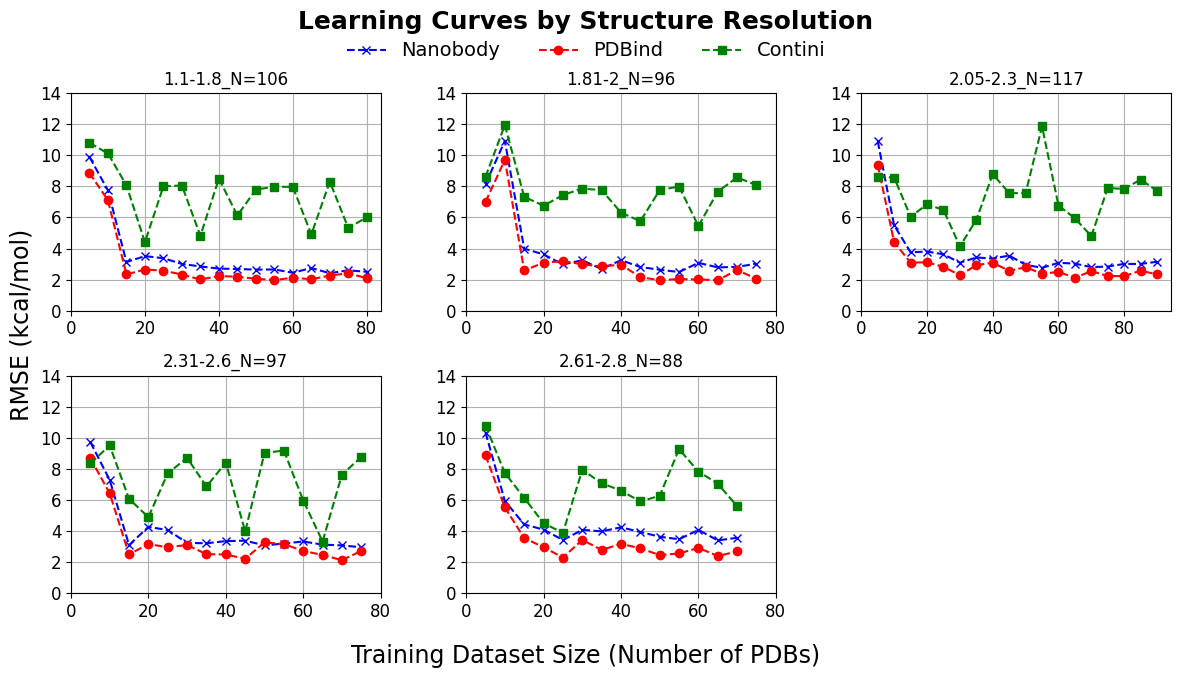

In [59]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12, 7))  # Wider to fit 3 plots in row
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1])  # 2 rows, 3 cols

colors = {"Nanobody": "blue", "PDBind": "red", "Contini_data": "green"}
markers = {"Nanobody": "x", "PDBind": "o", "Contini_data": "s"}
linestyles = {"Nanobody": "--", "PDBind": "--", "Contini_data": "--"}

# Assign axes in desired layout
axes = [
    fig.add_subplot(gs[0, 0]),  # Row 1, Col 1
    fig.add_subplot(gs[0, 1]),  # Row 1, Col 2
    fig.add_subplot(gs[0, 2]),  # Row 1, Col 3
    fig.add_subplot(gs[1, 0]),  # Row 2, Col 1
    fig.add_subplot(gs[1, 1])   # Row 2, Col 2
]

# Manually shift the bottom row plots to center them
for ax in [axes[3], axes[4]]:
    box = ax.get_position()
    ax.set_position([
        box.x0 + 0.05,  # Slight right shift for both to center together
        box.y0,
        box.width,
        box.height
    ])

line_labels = []

for idx, (title, rmse_dict) in enumerate(all_rmse_data.items()):
    ax = axes[idx]
    subset_sizes = all_subset_sizes[title]

    for name, rmse_values in rmse_dict.items():
        label = name.replace("_data", "").replace("_", " Å_")
        line, = ax.plot(
            subset_sizes[:len(rmse_values)],
            rmse_values,
            marker=markers[name],
            linestyle=linestyles[name],
            color=colors[name],
            label=label
        )
        if idx == 0:
            line_labels.append((line, label))

    clean_title = title.replace(".csv", "")
    ax.set_title(clean_title)
    ax.set_ylim(2, 14)
    ax.set_yticks(np.arange(0, 15, 2))
    ax.set_xticks(np.arange(0, 100, 20))
    ax.grid(True)
    # Change tick size
    ax.tick_params(axis='both', which='major', labelsize=12)

# Shared labels and title
fig.supxlabel("Training Dataset Size (Number of PDBs)", fontsize=17)
fig.supylabel("RMSE (kcal/mol)", fontsize=17)
fig.suptitle("Learning Curves by Structure Resolution", fontsize=18, y=0.95, fontweight='bold')

# Shared legend
legend_lines, legend_labels = zip(*line_labels)
fig.legend(legend_lines, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 0.93), ncol=3, fontsize=14, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()